<a href="https://colab.research.google.com/github/M20170138952/Data-science/blob/main/%C3%81rvores_de_decis%C3%A3o_e_florestas_aleat%C3%B3rias_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de decisão e florestas aleatórias em Python

Este é o código para o vídeo da conferência que aborda sobre os métodos de árvores de decisões em Python. Consulte o vídeo para uma explicação completa.

## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Obtendo os dados

In [ ]:
df = pd.read_csv('/kyphosis.csv')

In [ ]:
df.head(100)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


## EDA

Vamos observar um simples pairplot para este pequeno conjunto de dados.

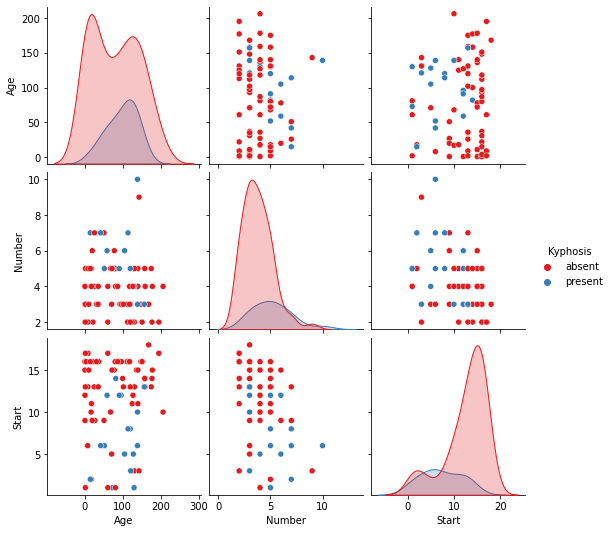

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Divisão treino-teste

Vamos dividir os dados em um conjunto de treinamento e um conjunto de testes!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Árvores de decisão

Começaremos apenas treinando uma única árvore de decisão.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Previsão e Avaliação

Vamos avaliar a nossa árvore de decisão.

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.76      0.86        21
     present       0.44      1.00      0.62         4

    accuracy                           0.80        25
   macro avg       0.72      0.88      0.74        25
weighted avg       0.91      0.80      0.82        25



In [ ]:
print(confusion_matrix(y_test,predictions))

[[16  5]
 [ 0  4]]


## Visualização de árvore

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Você não usará isso com freqüência e requer que você instale a biblioteca pydot, mas aqui está um exemplo do código para executar isso:

In [ ]:
from io import StringIO
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

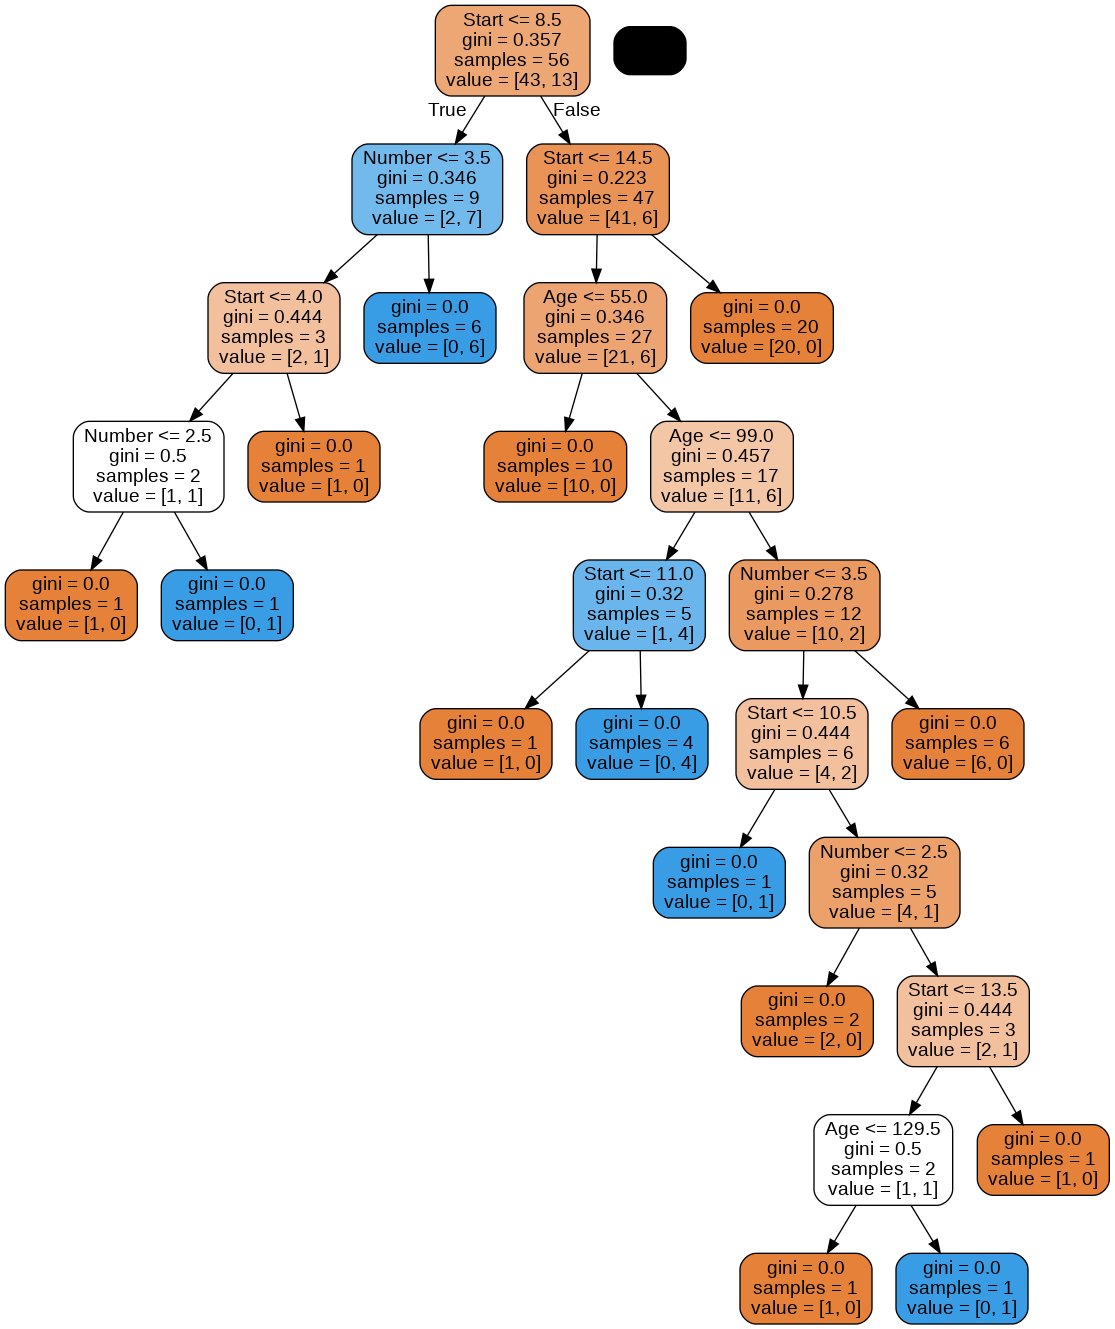

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Florestas aleatórias

Agora vamos comparar o modelo da árvore de decisão com uma floresta aleatória.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

ImportError: ignored

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 3  2]]


In [ ]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.86      0.90      0.88        20
    present       0.50      0.40      0.44         5

avg / total       0.79      0.80      0.79        25

